In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
#os.chdir('/home/jeremy/Documents/Jupyter')

# This data was downloaded as an .xls file.
# I see pandas provides a function to parse Excel spreadsheets, but for now, 
# I chose to convert the sheet I needed to a .csv file.
df = pd.read_excel('Currently married men and women.xls',header=3)

# The age groups:
#    15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65+
#  * The age groups are not populated consistently for USA. For the 1990 and 2000 entries, there is a note:
#    "Data shown for age groups 35-39 and 45-49 pertain to age groups 35-44 and 45-54, respectively."
age_groups = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']
percent_axis = [1,10,100]

#df

In [3]:
def generate_marriage_graphs(survey_country):
# Each country surveyed should have five unique sets of results, but the years change between countries
  survey_years = df.loc[(df['Country'] == survey_country),'Year'].unique() # Array of unique years!

# Sex ('Men' or 'Women'). In the future this may include non-binary gender values, you never know.
  survey_sexes = df.loc[(df['Country'] == survey_country),'Sex'].unique() 

  plt.figure(figsize=(15,5))

# Separate by sex, and iterate over survey_years.
  for sex_index,a_sex in enumerate(survey_sexes,1):
  
    for year_index, unique_year in enumerate(survey_years,1):
#    print('Iterating over index {}, year {}'.format(index,unique_year))
      df_yearfilter = df.loc[(df['Country'] == survey_country) & (df['Year'] == unique_year) & (df['Sex'] == a_sex), ['Sex'] + age_groups]

      df_yearfilter.set_index('Sex',inplace=True)

# Use an increasingly brighter shade for each decade (blue --> red).
      year_color = { 1: "#0000FF", 2: "#4400DD", 3: "#770088", 4: "#CC0044", 5: "#FF0000"}
      plt.subplot(1,len(survey_sexes),sex_index,title="Percentage of married {} in {}".format(a_sex.lower(),survey_country))
      plt.xlabel('Age Groups')
      plt.ylabel("Percent Married")
      plt.plot(df_yearfilter.transpose(), color=year_color[year_index])
      plt.legend(survey_years)
      #plt.show() #<--This caused each year's graph to appear in a separate graph and not together :(


### From the General Notes:
Population distribution by marital status is the percentage distribution of the population in a given age group by the different marital status categories.  Marital status is the personal status of each individual in relation to the marriage laws or customs of a country. The categories of marital status presented in World Marriage Data 2012 are: 

### (1) single (never married);
### (2) married;
### (3) widowed and not remarried;
### (4) divorced and not remarried; and
### (5) married but separated.

When data on persons living in consensual unions or with a visiting partner are reported they are also included as marital status categories. 

# Two northern European countries to start: Sweden, and Norway

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


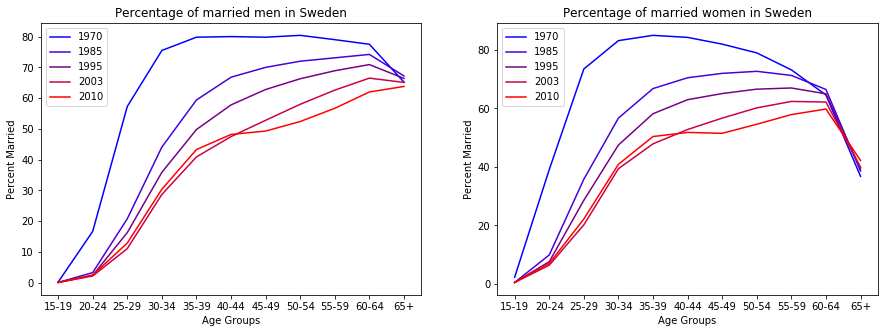

In [4]:
generate_marriage_graphs('Sweden')

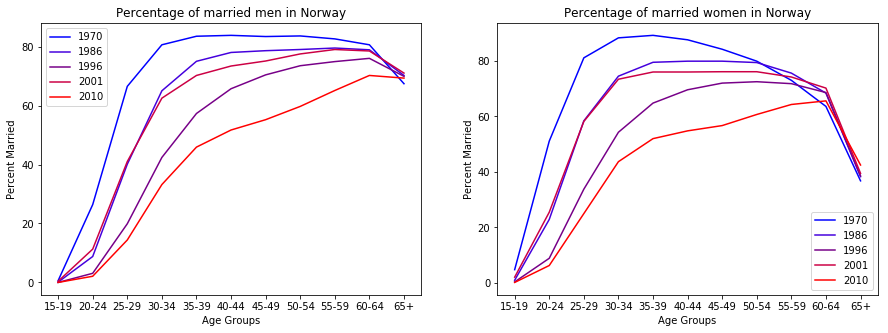

In [5]:
generate_marriage_graphs('Norway')

# Two southern European countries: Italy and Greece

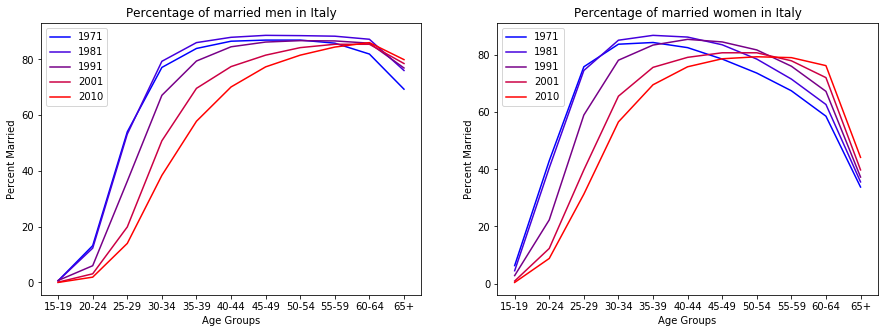

In [6]:
generate_marriage_graphs('Italy')

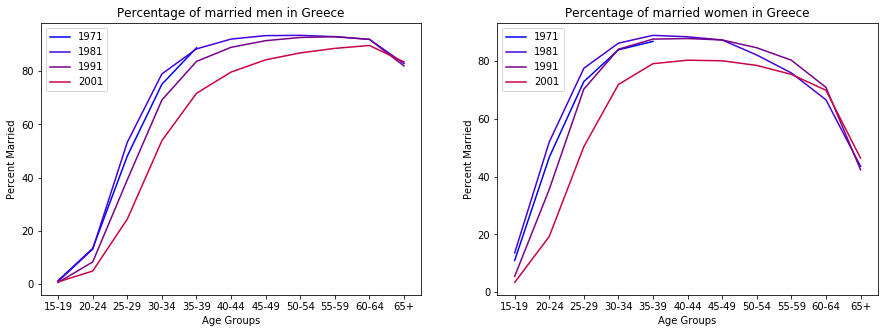

In [7]:
generate_marriage_graphs('Greece')

In [ ]:
# Oth

# Observations

There are a few stories to tell in just these four graphs:

* __Across most of the surveys, higher percentage of people from countries in southern Europe like Italy and Greece get (and remain) married, versus their northern neighbors in Sweden and Norway.__ The percentages were more even in the earliest surveys, with the differences becoming more and more pronounced through subsequent surveys.

* __In all four countries, the most recent surveys show that fewer people are getting married, and when they do marry, they wait until later in life than the previous generations.__ This is really pronounced in the northern European countries.

* __In all cases, there is a steep dropoff for people in their 60s and older, when we reach the point where I fear most responses have switched from "Married" to "Widowed".__

* __Men who reach 65+ apparently still have their spouses more often than women who reach this age group.__

* Honestly this might be better presented in a separate series of graphs, but look at the percentage of people from specific age groups across surveys--so, compare those 30-34 year olds from the surveys in the 1970s to 40-somethings in the 80s, 50-somethings in the 90s, etc.
    *  __We're only given one data for one status ("Married"), so when curves drop over age groups, it's hard to know if that's because of separation, divorce, or widowhood.__ That said, it's easier to guess in some instances. The steep dropoff of married older Italian women in the 1970s--lost husbands in World Wars I and II? Or just bad (good? 😉) living?
    *  __Graphs I generated below for France, Austria, and the UK show this same steep dropoff for women in the 1970s survey, with Italy and Austria by far showing the most pronounced drop.__ I wanted to add Germany to this list, but its earliest survey was taken in 1990, after reunification.



## Other countries whose marriage rates were possibly affected by WWII

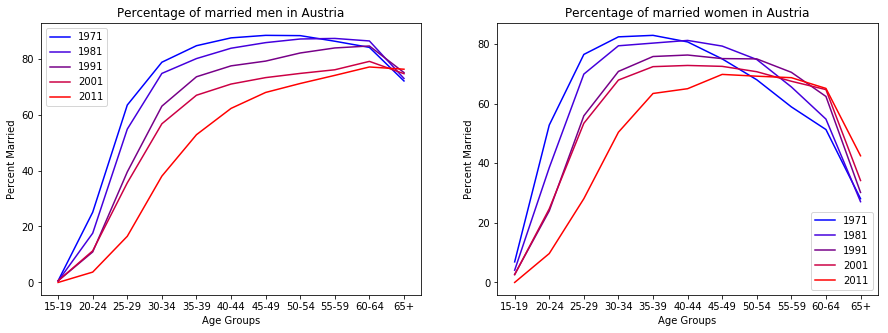

In [8]:
generate_marriage_graphs('Austria')

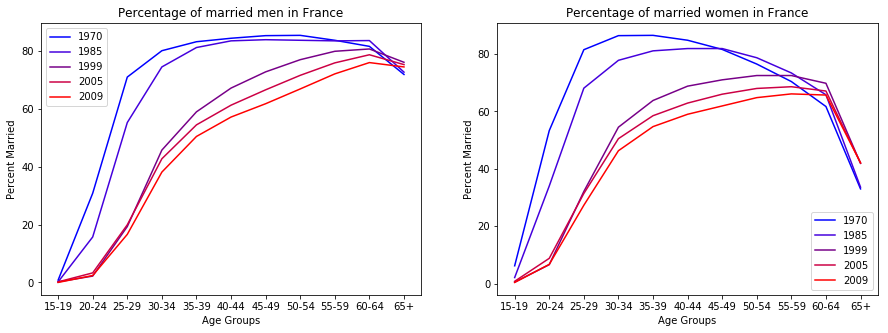

In [9]:
generate_marriage_graphs('France')

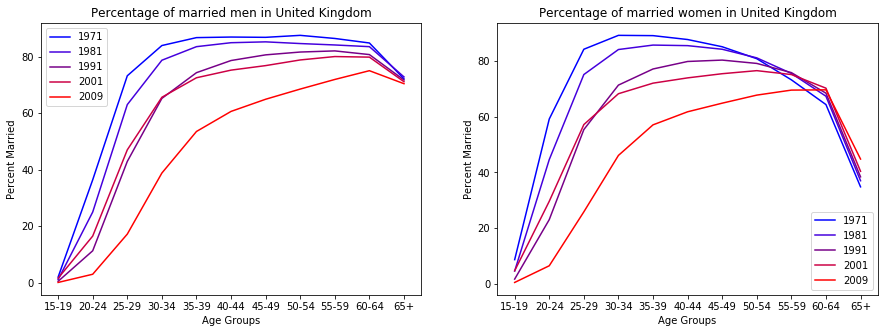

In [10]:
generate_marriage_graphs('United Kingdom')

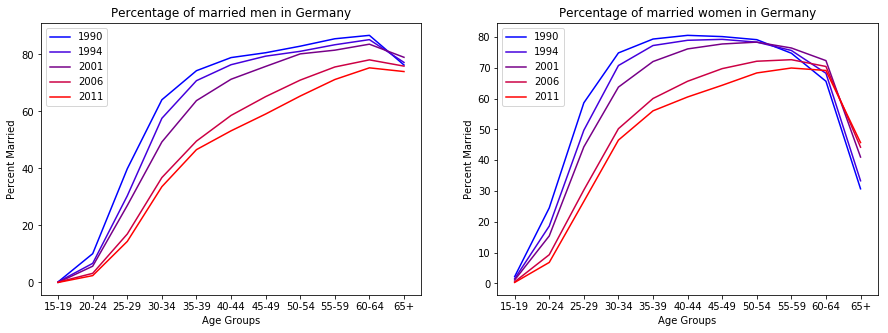

In [11]:
generate_marriage_graphs('Ger